In [1]:
# src/01_eda.ipynb

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Load data
df = pd.read_csv("D:\Desktop\Mental_Health_Analysis\data\survey.csv")

# Quick look
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
#Shape and column info
df.shape 
df.columns.to_list()
df.info()
df.describe(include="all") #.describe(): A method that generates descriptive statistics.

df[["Gender"]]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Gender
0,Female
1,M
2,Male
3,Male
4,Male
...,...
1254,male
1255,Male
1256,male
1257,f


In [3]:
df.columns.to_list()

['Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


comments          1095
state              515
work_interfere     264
self_employed       18
dtype: int64

In [5]:
required_columns = [
    'Gender', 
    'Country',
    'self_employed',
    'family_history',
    'treatment',
    'work_interfere',
    'remote_work',
    'tech_company',
    'benefits',
    'care_options',
    'wellness_program',
    'seek_help',
    'anonymity',
    'leave',
    'mental_health_consequence',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_health_interview',
    'phys_health_interview',
    'mental_vs_physical',
    'obs_consequence'
]

for column in required_columns:
    unique_vals = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values ({len(unique_vals)}): {unique_vals}")
    print("-" * 50)


Column: Gender
Unique values (49): ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
--------------------------------------------------
Column: Country
Unique values (48): ['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain'

In [6]:
df[["Age"]]

,Age
0,37
1,44
2,32
3,31
4,31
...,...
1254,26
1255,32
1256,34
1257,46


In [7]:
# 1. Normalize case and whitespace
df['Gender'] = df['Gender'].str.lower().str.strip()

# 2. Extended gender map
gender_map = {
    # Male
    'm': 'male', 'male': 'male', 'man': 'male', 'male-ish': 'male',
    'maile': 'male', 'malr': 'male', 'cis male': 'male', 'cis man': 'male',
    'make': 'male', 'msle': 'male', 'mail': 'male', 'mal': 'male',
    'cis-male': 'male', 'male (cis)': 'male',

    # Female
    'f': 'female', 'female': 'female', 'woman': 'female', 'femail': 'female',
    'cis female': 'female', 'femake': 'female', 'cis-female': 'female',
    'female (cis)': 'female', 'female-ish': 'female',

    # Trans
    'trans-female': 'trans', 'trans woman': 'trans', 'transfemale': 'trans',
    'transgender woman': 'trans', 'transgender': 'trans', 'trans person': 'trans',
    'trans': 'trans',

    # Nonbinary
    'non-binary': 'nonbinary', 'nonbinary': 'nonbinary', 'nb': 'nonbinary',
    'genderqueer': 'nonbinary', 'gender fluid': 'nonbinary', 'genderfluid': 'nonbinary',
    'agender': 'nonbinary', 'androgyne': 'nonbinary', 'enby': 'nonbinary',
    'gender nonconforming': 'nonbinary', 'gender variant': 'nonbinary',

    # Other
    'other': 'other', 'none': 'other', 'all': 'other', 'neuter': 'other',
    'fluid': 'other', 'something else': 'other', 'queer': 'other'
}

# 3. Apply the map
df['Gender'] = df['Gender'].replace(gender_map)


# 4. Fix leftover messy entries with substring checks (robust now)
def clean_gender(x):
    x = str(x).lower().strip()  # <<< THIS IS CRUCIAL
    # print(x)
    if x == 'other':
        return 'other'
    elif 'f' in x:
        return 'female'
    elif 'male' in x and 'f'not in x:
        return 'male'
    elif 't' in x:
        return 'trans'
    elif any(term in x for term in ['nonbinary', 'nb', 'genderqueer', 'agender', 'fluid']):
        return 'nonbinary'
    else:
        return 'other'

df['Gender'] = df['Gender'].apply(clean_gender)


# 5. Show final result
print("\n✅ Cleaned Gender Value Counts:")
print(df['Gender'].value_counts())





✅ Cleaned Gender Value Counts:
Gender
male         994
female       249
other          7
nonbinary      5
trans          4
Name: count, dtype: int64


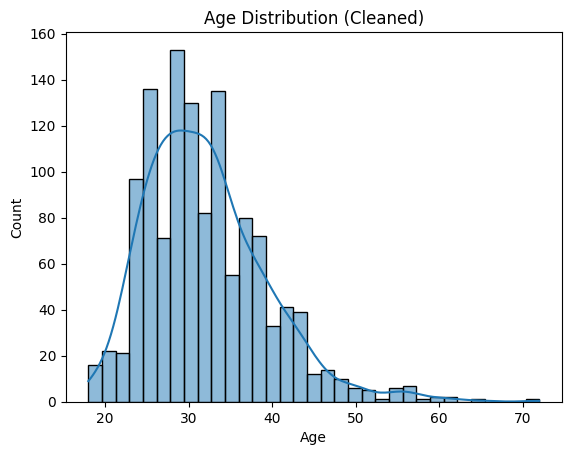

In [8]:
# Step 1: Force to numeric (non-convertibles become NaN)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Step 2: Drop NaN and Inf values
df = df[~df['Age'].isna()]
df = df[np.isfinite(df['Age'])]

# Step 3: Remove outliers (age must be between 16 and 70)
df = df[(df['Age'] >= 16) & (df['Age'] <= 75)]

# Step 4: Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution (Cleaned)")
plt.savefig("../outputs/figures/age_distribution_cleaned.png")
plt.show()

Age Statistics

In [9]:
print(df['Age'].describe())


count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


Bar Graph of Treatment by Gender


✅ Cleaned Gender Value Counts:
Gender
male         989
female       249
nonbinary      5
other          5
trans          3
Name: count, dtype: int64


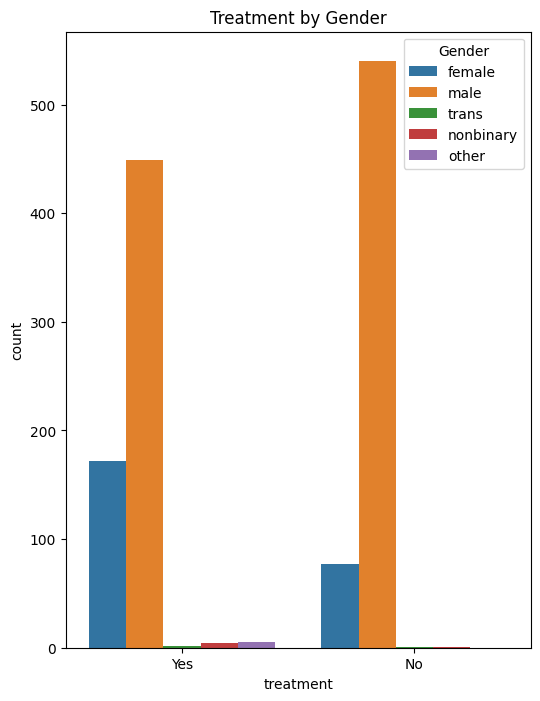

In [10]:
# 1. Normalize case and whitespace
df['Gender'] = df['Gender'].str.lower().str.strip()

# 2. Extended gender map
gender_map = {
    # Male
    'm': 'male', 'male': 'male', 'man': 'male', 'male-ish': 'male',
    'maile': 'male', 'malr': 'male', 'cis male': 'male', 'cis man': 'male',
    'make': 'male', 'msle': 'male', 'mail': 'male', 'mal': 'male',
    'cis-male': 'male', 'male (cis)': 'male',

    # Female
    'f': 'female', 'female': 'female', 'woman': 'female', 'femail': 'female',
    'cis female': 'female', 'femake': 'female', 'cis-female': 'female',
    'female (cis)': 'female', 'female-ish': 'female',

    # Trans
    'trans-female': 'trans', 'trans woman': 'trans', 'transfemale': 'trans',
    'transgender woman': 'trans', 'transgender': 'trans', 'trans person': 'trans',
    'trans': 'trans',

    # Nonbinary
    'non-binary': 'nonbinary', 'nonbinary': 'nonbinary', 'nb': 'nonbinary',
    'genderqueer': 'nonbinary', 'gender fluid': 'nonbinary', 'genderfluid': 'nonbinary',
    'agender': 'nonbinary', 'androgyne': 'nonbinary', 'enby': 'nonbinary',
    'gender nonconforming': 'nonbinary', 'gender variant': 'nonbinary',

    # Other
    'other': 'other', 'none': 'other', 'all': 'other', 'neuter': 'other',
    'fluid': 'other', 'something else': 'other', 'queer': 'other'
}

# 3. Apply the map
df['Gender'] = df['Gender'].replace(gender_map)


# 4. Fix leftover messy entries with substring checks (robust now)
def clean_gender(x):
    x = str(x).lower().strip()  # <<< THIS IS CRUCIAL
    # print(x)
    if x == 'other':
        return 'other'
    elif 'f' in x:
        return 'female'
    elif 'male' in x and 'f'not in x:
        return 'male'
    elif 't' in x:
        return 'trans'
    elif any(term in x for term in ['nonbinary', 'nb', 'genderqueer', 'agender', 'fluid']):
        return 'nonbinary'
    else:
        return 'other'

df['Gender'] = df['Gender'].apply(clean_gender)

# 5. Show final result
print("\n✅ Cleaned Gender Value Counts:")
print(df['Gender'].value_counts())


plt.figure(figsize=(6,8))
sns.countplot(x="treatment", hue="Gender", data=df)
plt.title("Treatment by Gender")
plt.savefig("../outputs/figures/treatment_by_gender.png")
plt.show()



Line Graph of Treatment by Gender


✅ Cleaned Gender Value Counts:
Gender
male         989
female       249
nonbinary      5
other          5
trans          3
Name: count, dtype: int64


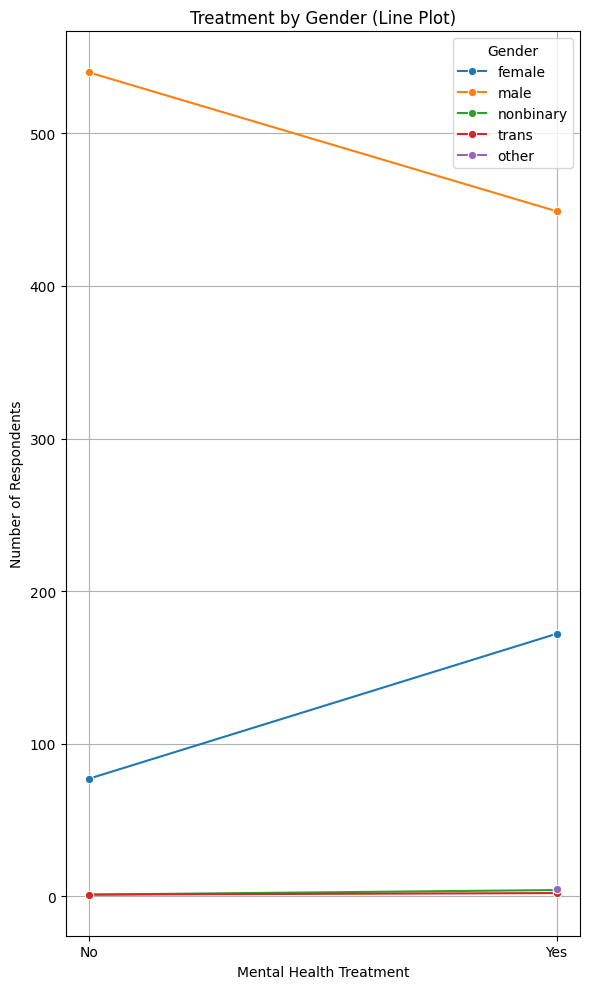

In [11]:
# 1. Normalize case and whitespace
df['Gender'] = df['Gender'].str.lower().str.strip()

# 2. Extended gender map
gender_map = {
    # Male
    'm': 'male', 'male': 'male', 'man': 'male', 'male-ish': 'male',
    'maile': 'male', 'malr': 'male', 'cis male': 'male', 'cis man': 'male',
    'make': 'male', 'msle': 'male', 'mail': 'male', 'mal': 'male',
    'cis-male': 'male', 'male (cis)': 'male',

    # Female
    'f': 'female', 'female': 'female', 'woman': 'female', 'femail': 'female',
    'cis female': 'female', 'femake': 'female', 'cis-female': 'female',
    'female (cis)': 'female', 'female-ish': 'female',

    # Trans
    'trans-female': 'trans', 'trans woman': 'trans', 'transfemale': 'trans',
    'transgender woman': 'trans', 'transgender': 'trans', 'trans person': 'trans',
    'trans': 'trans',

    # Nonbinary
    'non-binary': 'nonbinary', 'nonbinary': 'nonbinary', 'nb': 'nonbinary',
    'genderqueer': 'nonbinary', 'gender fluid': 'nonbinary', 'genderfluid': 'nonbinary',
    'agender': 'nonbinary', 'androgyne': 'nonbinary', 'enby': 'nonbinary',
    'gender nonconforming': 'nonbinary', 'gender variant': 'nonbinary',

    # Other
    'other': 'other', 'none': 'other', 'all': 'other', 'neuter': 'other',
    'fluid': 'other', 'something else': 'other', 'queer': 'other'
}

# 3. Apply the map
df['Gender'] = df['Gender'].replace(gender_map)


# 4. Fix leftover messy entries with substring checks (robust now)
def clean_gender(x):
    x = str(x).lower().strip()  # <<< THIS IS CRUCIAL
    # print(x)
    if x == 'other':
        return 'other'
    elif 'f' in x:
        return 'female'
    elif 'male' in x and 'f'not in x:
        return 'male'
    elif 't' in x:
        return 'trans'
    elif any(term in x for term in ['nonbinary', 'nb', 'genderqueer', 'agender', 'fluid']):
        return 'nonbinary'
    else:
        return 'other'

df['Gender'] = df['Gender'].apply(clean_gender)

# 5. Show final result
print("\n✅ Cleaned Gender Value Counts:")
print(df['Gender'].value_counts())

# Step 1: Group and count the data manually
treatment_gender_counts = df.groupby(['treatment', 'Gender']).size().reset_index(name='count')

# Step 2: Create the line plot
plt.figure(figsize=(6, 10))
sns.lineplot(
    data=treatment_gender_counts,
    x="treatment",        # x-axis: 'Yes' or 'No'
    y="count",            # y-axis: how many people
    hue="Gender",         # separate line for each gender
    marker="o"            # add markers for clarity
)

# Step 3: Customize
plt.title("Treatment by Gender (Line Plot)")
plt.ylabel("Number of Respondents")
plt.xlabel("Mental Health Treatment")
plt.legend(title="Gender")
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/figures/treatment_by_gender_lineplot.png")
plt.show()


Stripplot of Treatment by Gender [No use plotting stripplot/swarmplot]


✅ Cleaned Gender Value Counts:
Gender
male         989
female       249
nonbinary      5
other          5
trans          3
Name: count, dtype: int64


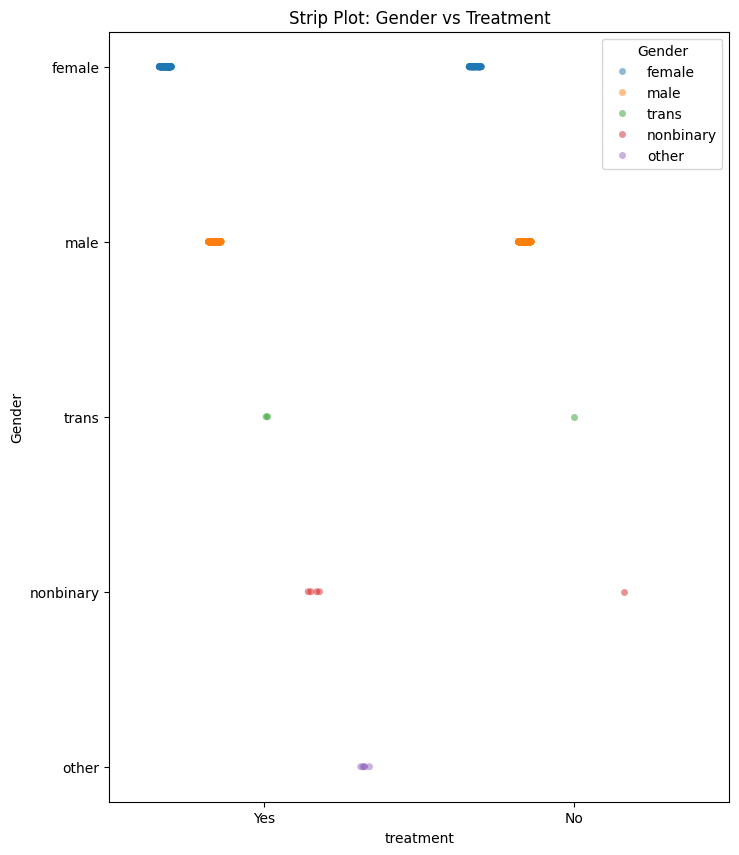

In [12]:
# 1. Normalize case and whitespace
df['Gender'] = df['Gender'].str.lower().str.strip()

# 2. Extended gender map
gender_map = {
    # Male
    'm': 'male', 'male': 'male', 'man': 'male', 'male-ish': 'male',
    'maile': 'male', 'malr': 'male', 'cis male': 'male', 'cis man': 'male',
    'make': 'male', 'msle': 'male', 'mail': 'male', 'mal': 'male',
    'cis-male': 'male', 'male (cis)': 'male',

    # Female
    'f': 'female', 'female': 'female', 'woman': 'female', 'femail': 'female',
    'cis female': 'female', 'femake': 'female', 'cis-female': 'female',
    'female (cis)': 'female', 'female-ish': 'female',

    # Trans
    'trans-female': 'trans', 'trans woman': 'trans', 'transfemale': 'trans',
    'transgender woman': 'trans', 'transgender': 'trans', 'trans person': 'trans',
    'trans': 'trans',

    # Nonbinary
    'non-binary': 'nonbinary', 'nonbinary': 'nonbinary', 'nb': 'nonbinary',
    'genderqueer': 'nonbinary', 'gender fluid': 'nonbinary', 'genderfluid': 'nonbinary',
    'agender': 'nonbinary', 'androgyne': 'nonbinary', 'enby': 'nonbinary',
    'gender nonconforming': 'nonbinary', 'gender variant': 'nonbinary',

    # Other
    'other': 'other', 'none': 'other', 'all': 'other', 'neuter': 'other',
    'fluid': 'other', 'something else': 'other', 'queer': 'other'
}

# 3. Apply the map
df['Gender'] = df['Gender'].replace(gender_map)


# 4. Fix leftover messy entries with substring checks (robust now)
def clean_gender(x):
    x = str(x).lower().strip()  # <<< THIS IS CRUCIAL
    # print(x)
    if x == 'other':
        return 'other'
    elif 'f' in x:
        return 'female'
    elif 'male' in x and 'f'not in x:
        return 'male'
    elif 't' in x:
        return 'trans'
    elif any(term in x for term in ['nonbinary', 'nb', 'genderqueer', 'agender', 'fluid']):
        return 'nonbinary'
    else:
        return 'other'

df['Gender'] = df['Gender'].apply(clean_gender)

# 5. Show final result
print("\n✅ Cleaned Gender Value Counts:")
print(df['Gender'].value_counts())

plt.figure(figsize=(8, 10))
sns.stripplot(x="treatment", y="Gender", data=df, jitter=True, hue="Gender", dodge=True, alpha=0.5)
plt.title("Strip Plot: Gender vs Treatment")
plt.savefig("../outputs/figures/treatment_by_gender_stripplot.png")
plt.show()


Treatment by Age Group

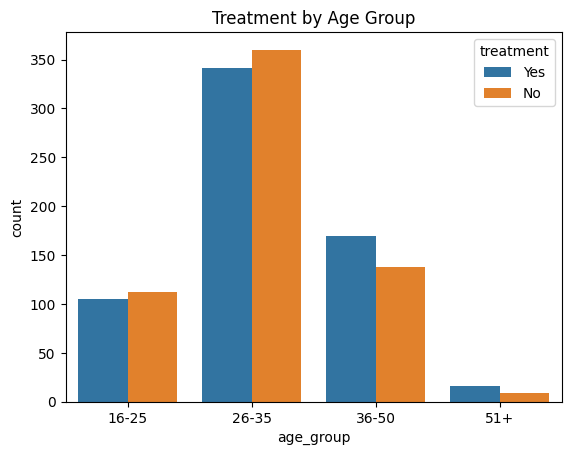

In [13]:
df['age_group'] = pd.cut(df['Age'], bins=[15, 25, 35, 50, 70], 
                         labels=['16-25', '26-35', '36-50', '51+'])

sns.countplot(data=df, x='age_group', hue='treatment')
plt.title("Treatment by Age Group")
plt.savefig("../outputs/figures/treatment_by_age_group.png")
plt.show()


Company Support Variables

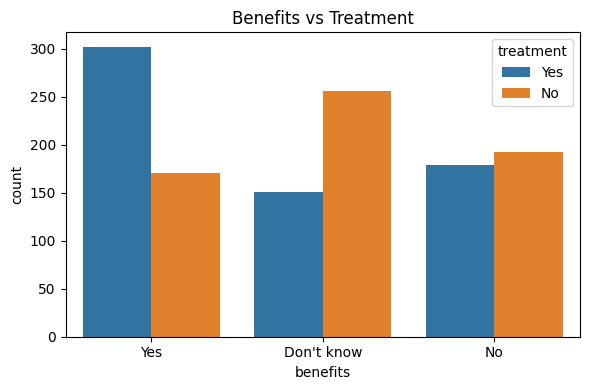

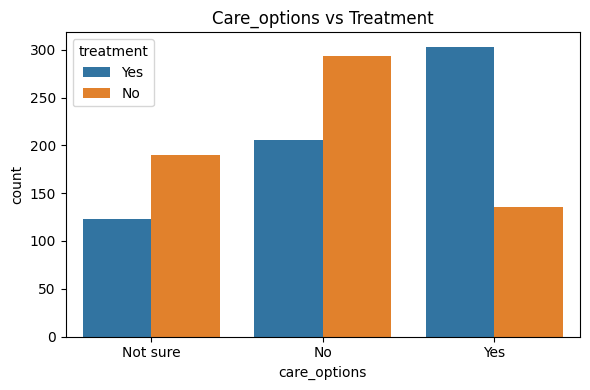

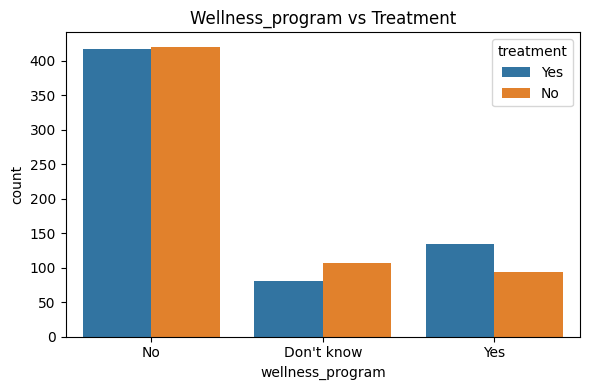

In [14]:
support_cols = ['benefits', 'care_options', 'wellness_program']

for col in support_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='treatment')
    plt.title(f"{col.capitalize()} vs Treatment")
    #plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"../outputs/figures/{col}_vs_treatment.png")
    plt.show()


Country-wise Breakdown [Top 10]

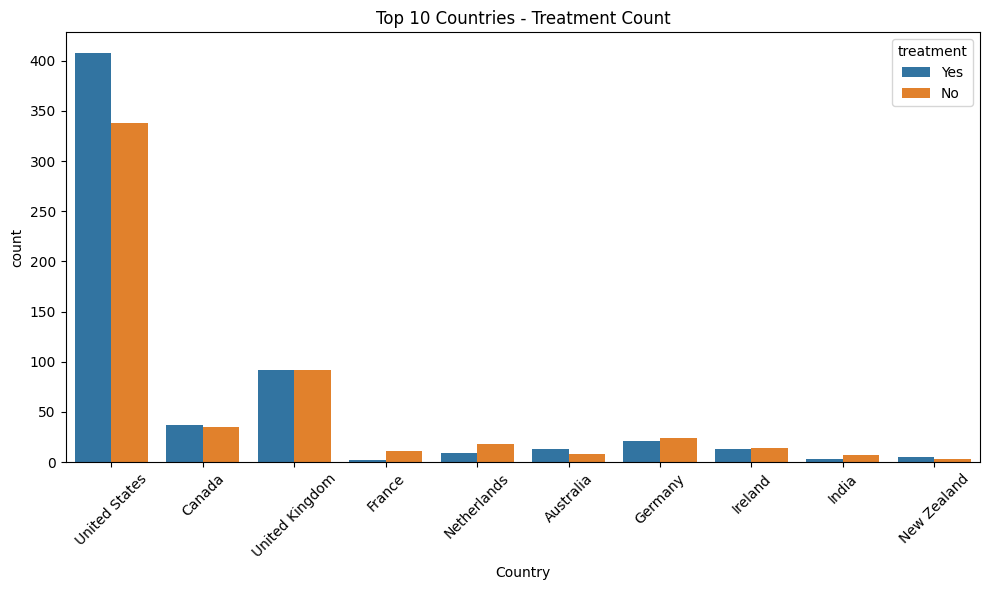

In [15]:
top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(10,6))
sns.countplot(data=df_top, x='Country', hue='treatment')
plt.title("Top 10 Countries - Treatment Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../outputs/figures/treatment_by_country_top10.png")
plt.show()


 Correlation [Numerical Features Only]  (No point doing it since we know we have only 1 col with numeric data)

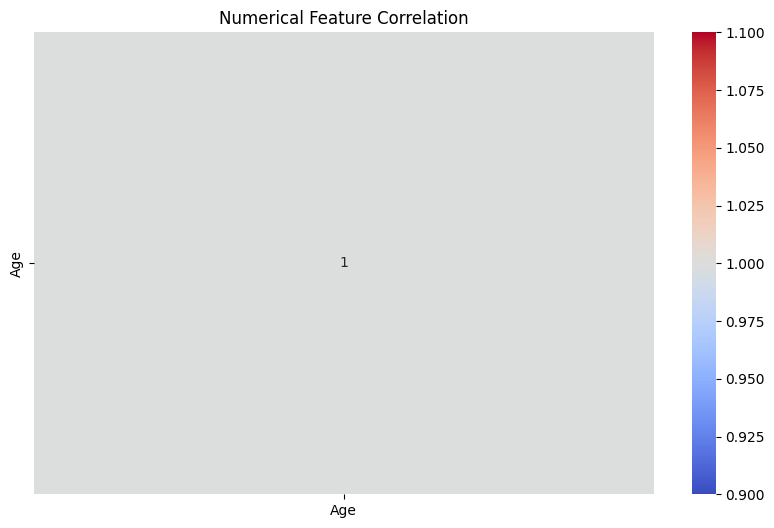

In [16]:
corr = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Numerical Feature Correlation")
plt.savefig("../outputs/figures/correlation_matrix.png")
plt.show()


In [19]:
df.head(1)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,age_group
0,2014-08-27 11:29:31,37,female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,36-50
